In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
fruits = pd.read_table('datasets/Fruit data with colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


## Create label for data

In [3]:
lookup_fruit_name= dict(zip(fruits['fruit_label'].unique(), fruits['fruit_name'].unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

## Create classifier object and fit the train datasets

In [12]:
from sklearn.neighbors import KNeighborsClassifier
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=11)

## Score the model 

In [13]:
from sklearn.metrics import accuracy_score
score = knn.score(X_test, y_test)
y_predict = knn.predict(X_test)
accuracy_score(y_predict, y_test)
df = pd.DataFrame(y_test)
df.columns = ['Fruit_test']
df['Fruit_predict'] = y_predict
df['Actual Label'] = fruits.loc[y_test.index, 'fruit_label']
df['Actual Name'] = fruits.loc[y_test.index, 'fruit_name']
df


,Fruit_test,Fruit_predict,Actual Label,Actual Name
26,3,3,3,orange
35,3,1,3,orange
43,4,1,4,lemon
28,3,1,3,orange
11,1,1,1,apple
2,1,1,1,apple
34,3,1,3,orange
46,4,1,4,lemon
40,3,1,3,orange
22,1,1,1,apple


In [14]:
score

0.3333333333333333

## Use the trained k-NN classifier model to classify new, poreviously unseen objects

In [15]:
# predict with data point mass = 20, width = 4.3, height = 5.5
predict_point = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[predict_point[0]]

/Users/minhnguyen/Workspace/BIGDATA/bigdata-venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

In [16]:
# predict with data point mass = 100, width = 6.3, height = 8.5
predict_point_2 = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[predict_point_2[0]]

/Users/minhnguyen/Workspace/BIGDATA/bigdata-venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

## Plot the decision boundaries of the k-NN classifier

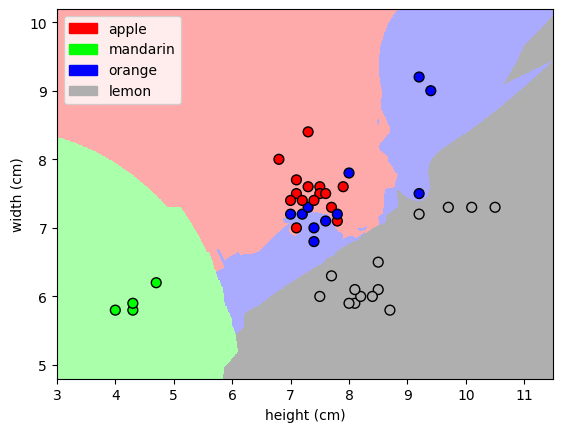

In [18]:
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train, y_train, 11, 'distance')

## How sensitive is k-NN classification accruracy to the choice of the 'k' parameter?

([<matplotlib.axis.XTick at 0x30ef114d0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

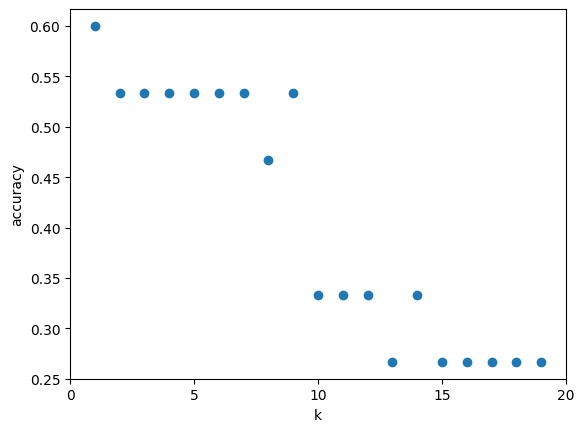

In [10]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

## Plot the train, test score

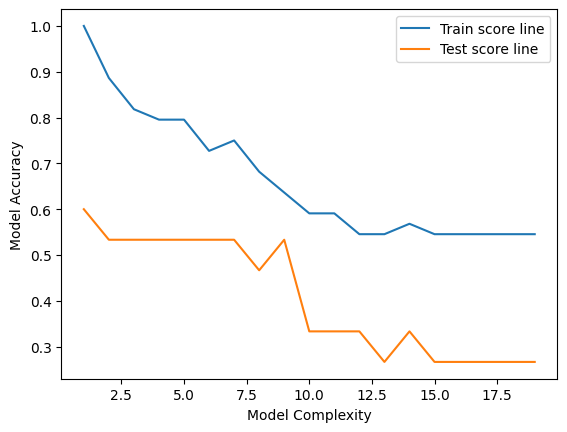

In [11]:
k_range = range(1, 20)
train_score = np.empty(len(k_range))
test_score = np.empty(len(k_range))

for i, k in enumerate(k_range):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  train_score[i] = knn.score(X_train, y_train)
  test_score[i] = knn.score(X_test, y_test)

plt.plot(k_range, train_score, label =  'Train score line')
plt.plot(k_range, test_score, label =  'Test score line')

plt.legend()
plt.xlabel('Model Complexity')
plt.ylabel('Model Accuracy')
plt.show()